# Basic visualisations for the Brazil Flight schedule dataset

Dataset can be downloaded from https://www.kaggle.com/datasets/ramirobentes/flights-in-brazil
⚠️ No link to actual provenance is provided

Alledgedly from https://www.gov.br/anac/en

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Information

In [2]:
years = [9,10,11,12,13,14,15,16,17,18] # 2009-2018
years = [18] # Too many years, take 1 for example purposes
dfs = []
for i in years:
    df = pd.read_csv(f'archive/20{i:02d}.csv')
    df.drop(columns=df.columns[-1])
    dfs.append(df)

df = pd.concat(dfs)
df = df.drop(columns=df.columns[-1]) # Drop the last column, which is unnnamed and empty
# filter 20 first columns contain no NaN values
first_20_cols = df.columns[:2]
df = df.dropna(subset=first_20_cols, how='any')

exclude_percent = 0.01

# Calculate the lower and upper bounds for AIR_TIME
lower_bound_air = df['AIR_TIME'].quantile(exclude_percent / 2)
upper_bound_air = df['AIR_TIME'].quantile(1 - exclude_percent / 2)

# Filter the data
df = df[(df['AIR_TIME'] >= lower_bound_air) & (df['AIR_TIME'] <= upper_bound_air)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7018265 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24  NAS

In [3]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,7.018265e+06,7.018265e+06,7.018265e+06,7.013550e+06,7.018265e+06,7.018265e+06,7.018265e+06,7.018265e+06,7.018265e+06,7.018265e+06,...,7018265.0,7.018265e+06,7.018265e+06,7.018265e+06,7.018265e+06,1.339441e+06,1.339441e+06,1.339441e+06,1.339441e+06,1.339441e+06
mean,2.603716e+03,1.328075e+03,1.333254e+03,9.914866e+00,1.738327e+01,1.357219e+03,1.462396e+03,7.599183e+00,1.485502e+03,1.467073e+03,...,0.0,1.402603e+02,1.353882e+02,1.104058e+02,7.935803e+02,1.942640e+01,3.639155e+00,1.584958e+01,9.312019e-02,2.573097e+01
std,1.855713e+03,4.908849e+02,5.046422e+02,4.457643e+01,9.901135e+00,5.061070e+02,5.329175e+02,6.044190e+00,5.179455e+02,5.371363e+02,...,0.0,7.057704e+01,7.012834e+01,6.811756e+01,5.763376e+02,5.876145e+01,2.994138e+01,3.594268e+01,3.169242e+00,4.974012e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.220000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.0,-9.900000e+01,2.700000e+01,2.100000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.037000e+03,9.130000e+02,9.150000e+02,-5.000000e+00,1.100000e+01,9.310000e+02,1.044000e+03,4.000000e+00,1.100000e+03,1.049000e+03,...,0.0,8.900000e+01,8.300000e+01,6.000000e+01,3.650000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.128000e+03,1.320000e+03,1.326000e+03,-2.000000e+00,1.500000e+01,1.339000e+03,1.502000e+03,6.000000e+00,1.515000e+03,1.506000e+03,...,0.0,1.220000e+02,1.180000e+02,9.200000e+01,6.320000e+02,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
75%,4.064000e+03,1.735000e+03,1.744000e+03,7.000000e+00,2.000000e+01,1.759000e+03,1.911000e+03,9.000000e+00,1.918000e+03,1.916000e+03,...,0.0,1.700000e+02,1.660000e+02,1.400000e+02,1.028000e+03,1.700000e+01,0.000000e+00,1.900000e+01,0.000000e+00,3.200000e+01
max,7.909000e+03,2.359000e+03,2.400000e+03,2.710000e+03,1.960000e+02,2.400000e+03,2.400000e+03,2.590000e+02,2.400000e+03,2.400000e+03,...,0.0,4.410000e+02,5.620000e+02,3.540000e+02,3.711000e+03,2.109000e+03,2.692000e+03,1.848000e+03,9.870000e+02,2.454000e+03


Notice above how the Diverted columns is unused

## Basic visualizations

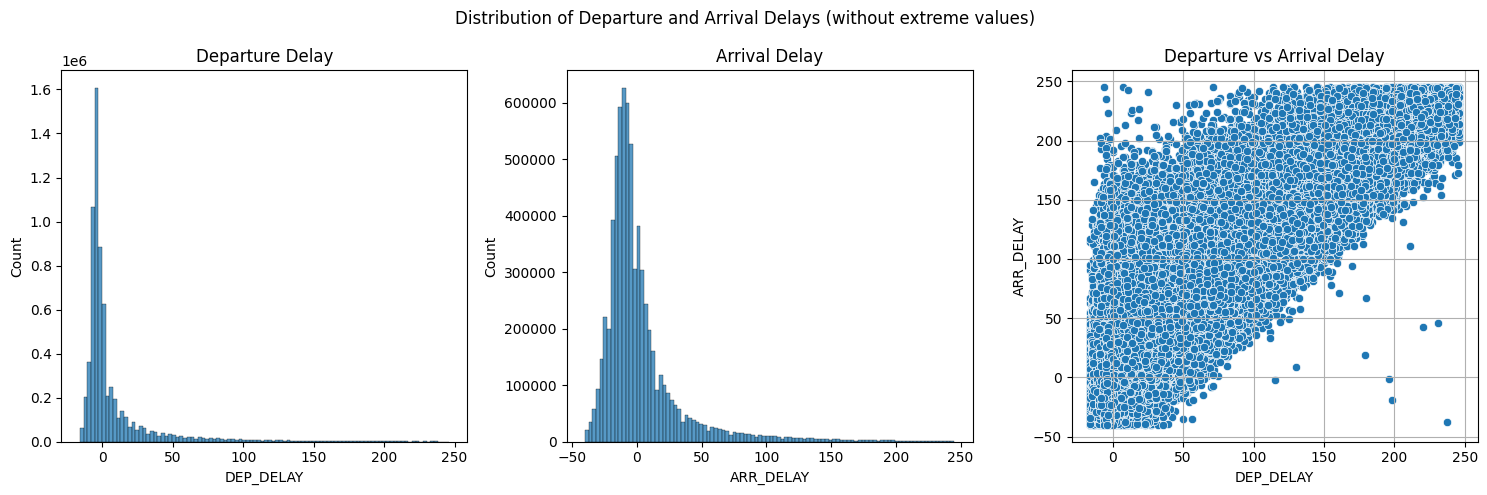

In [5]:
# Define the percentage of extreme values you want to exclude
exclude_percent = 0.01  # Exclude 1% of the most extreme values

# Calculate the lower and upper bounds
lower_bound_dep = df['DEP_DELAY'].quantile(exclude_percent / 2)
upper_bound_dep = df['DEP_DELAY'].quantile(1 - exclude_percent / 2)

lower_bound_arr = df['ARR_DELAY'].quantile(exclude_percent / 2)
upper_bound_arr = df['ARR_DELAY'].quantile(1 - exclude_percent / 2)

# Filter the data
filtered_data = df[(df['DEP_DELAY'] >= lower_bound_dep) & (df['DEP_DELAY'] <= upper_bound_dep) & 
                   (df['ARR_DELAY'] >= lower_bound_arr) & (df['ARR_DELAY'] <= upper_bound_arr)]


# Create the plots
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

sns.histplot(filtered_data['DEP_DELAY'], ax=axs[0], log_scale=False, bins=100)
axs[0].set_title('Departure Delay')

sns.histplot(filtered_data['ARR_DELAY'], ax=axs[1], log_scale=False, bins=100)
axs[1].set_title('Arrival Delay')

sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=filtered_data, ax=axs[2])
axs[2].set_title('Departure vs Arrival Delay')
axs[2].grid(True)

fig.suptitle('Distribution of Departure and Arrival Delays (without extreme values)')

plt.tight_layout()
plt.show()

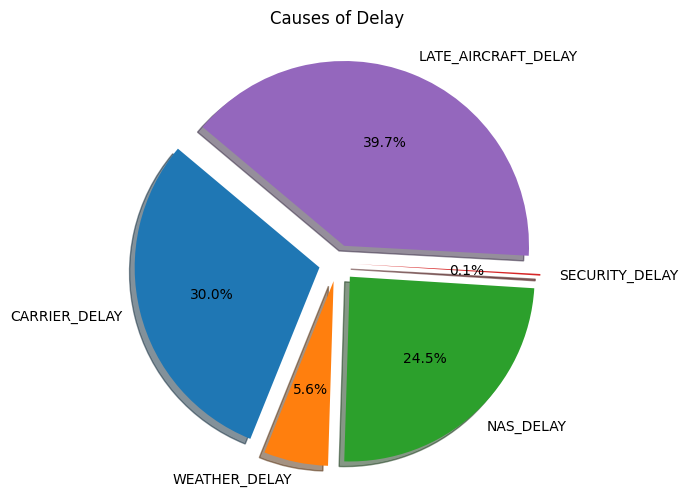

In [6]:
delay_types = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_sums = df[delay_types].sum()

# Define colors as a list
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(delay_sums, labels=delay_types, autopct='%1.1f%%', startangle=140, explode=(0.1, 0.1, 0.1, 0.1, 0.1), colors=colors, shadow=True)

plt.title('Causes of Delay')
plt.show()

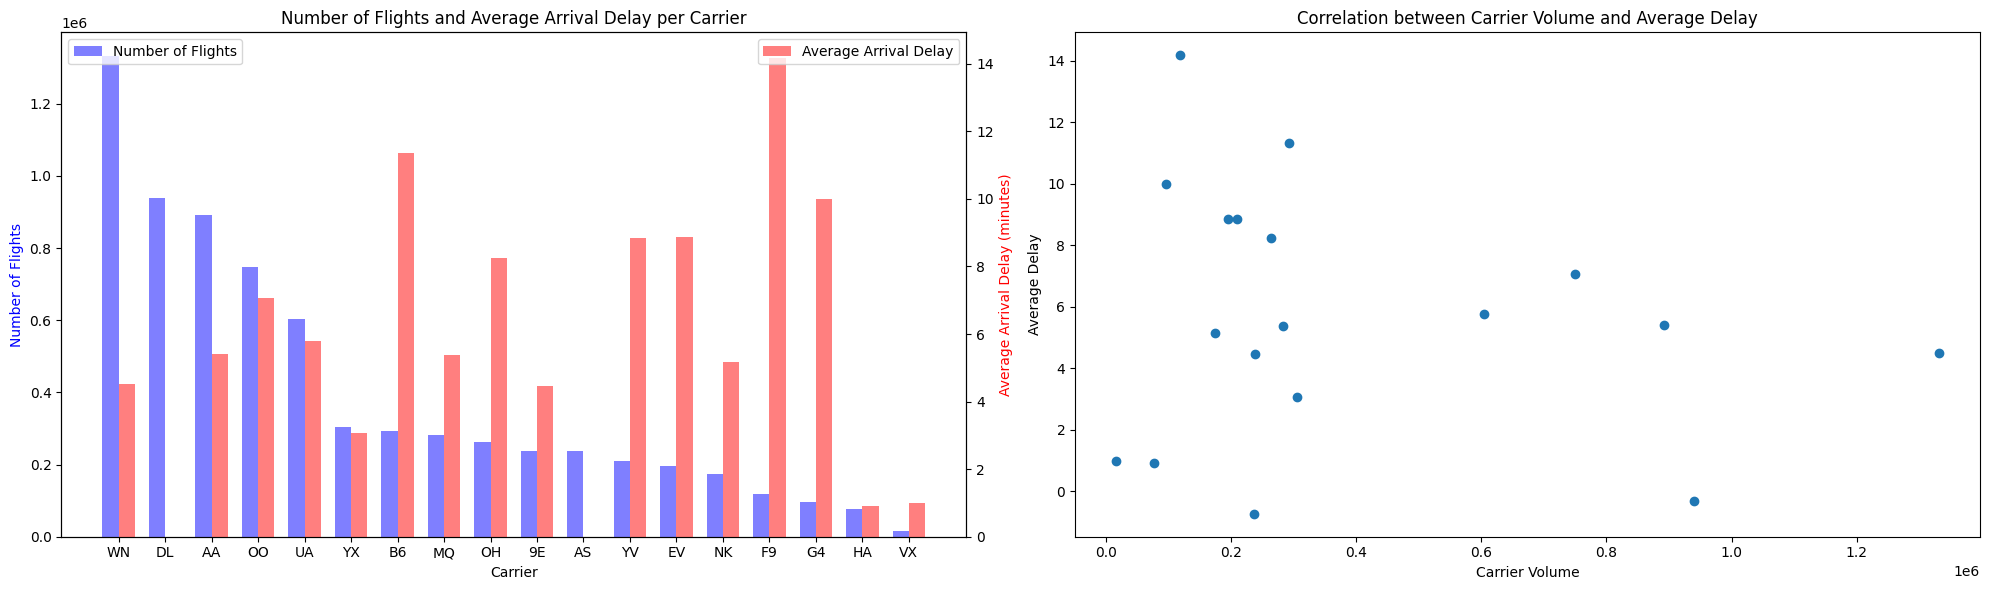

In [7]:
top_carriers = df['OP_CARRIER'].value_counts()

avg_delay_per_carrier = df.groupby('OP_CARRIER')['ARR_DELAY'].mean().loc[top_carriers.index]

# Define the width of the bars
width = 0.35

# Create an array with the positions of the bars on the x axis
x = np.arange(len(top_carriers))
import matplotlib.pyplot as plt
import numpy as np

# Define the width of the bars
width = 0.35

# Create an array with the positions of the bars on the x axis
x = np.arange(len(top_carriers))

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the number of flights per carrier
rects1 = ax1.bar(x - width/2, top_carriers, width, label='Number of Flights', color='b', alpha=0.5)

# Create a second y-axis for the average delay per carrier
ax2 = ax1.twinx()

# Plot the average delay per carrier
rects2 = ax2.bar(x + width/2, avg_delay_per_carrier, width, label='Average Arrival Delay', color='r', alpha=0.5)

# Add labels, title and legend
ax1.set_xlabel('Carrier')
ax1.set_ylabel('Number of Flights', color='b')
ax2.set_ylabel('Average Arrival Delay (minutes)', color='r')
ax1.set_title('Number of Flights and Average Arrival Delay per Carrier')
ax1.set_xticks(x)
ax1.set_xticklabels(top_carriers.index)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Create a scatter plot
ax3.scatter(top_carriers, avg_delay_per_carrier.loc[top_carriers.index])
ax3.set_title('Correlation between Carrier Volume and Average Delay')
ax3.set_xlabel('Carrier Volume')
ax3.set_ylabel('Average Delay')

plt.tight_layout()
plt.show()

In [8]:
# Creating categories for the AIR_TIME column
bins = [0, 60, 120, 180, 240, np.inf]
names = ['<1H', '1-2H', '2-3H', '3-4H', '4H+']

df['AirTimeCategory'] = pd.cut(df['AIR_TIME'], bins, labels=names)

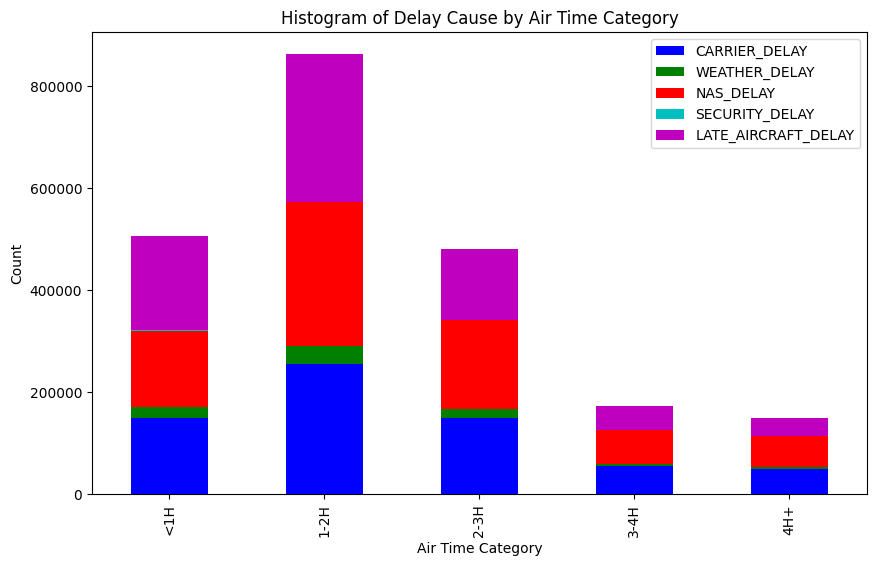

In [9]:
delay_reasons = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm']

fig, ax = plt.subplots(figsize=(10, 6))

# Initialize a DataFrame to store the counts for each delay reason
counts_df = pd.DataFrame()

# Loop through each delay reason
for reason in delay_reasons:
    # Filter the data for the current delay reason
    delay_data = df[df[reason] > 0]
    
    # Calculate the counts for the current delay reason
    counts = delay_data['AirTimeCategory'].value_counts().sort_index()
    
    # Add the counts to the DataFrame
    counts_df[reason] = counts

# Plot a stacked bar chart of the counts
counts_df.plot(kind='bar', stacked=True, color=colors, ax=ax)

# Add labels, title and legend
ax.set_xlabel('Air Time Category')
ax.set_ylabel('Count')
ax.set_title('Histogram of Delay Cause by Air Time Category')
ax.legend()

plt.show()